In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


data_path = 'sprint3_transactions.csv'
data = pd.read_csv(data_path)


X = data.drop('Class', axis=1)
y = data['Class']

#Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Reshape data for CNN input
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [2]:
from tensorflow.keras.utils import to_categorical

#Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/DaveManderson/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,794 (225.76 KB)

 Trainable params: 57,794 (225.76 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train_reshaped, y_train_encoded, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9974 - loss: 0.0139 - val_accuracy: 0.9981 - val_loss: 0.0078
Epoch 2/50
4716/4716 - 15s - 3ms/step - accuracy: 0.9980 - loss: 0.0096 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 3/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 4/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9982 - loss: 0.0075 - val_accuracy: 0.9985 - val_loss: 0.0058
Epoch 5/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9983 - loss: 0.0070 - val_accuracy: 0.9982 - val_loss: 0.0066
Epoch 6/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9988 - val_loss: 0.0047
Epoch 7/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9985 - loss: 0.0056 - val_accuracy: 0.9989 - val_loss: 0.0043
Epoch 8/50
4716/4716 - 16s - 3ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9988 - val_loss: 0.0045
Epoch 9/50
4716/4716 - 17s - 4ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 

In [5]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=2)
print(f"Test accuracy: {accuracy*100:.2f}%")

1474/1474 - 1s - 436us/step - accuracy: 0.9991 - loss: 0.0092
Test accuracy: 99.91%


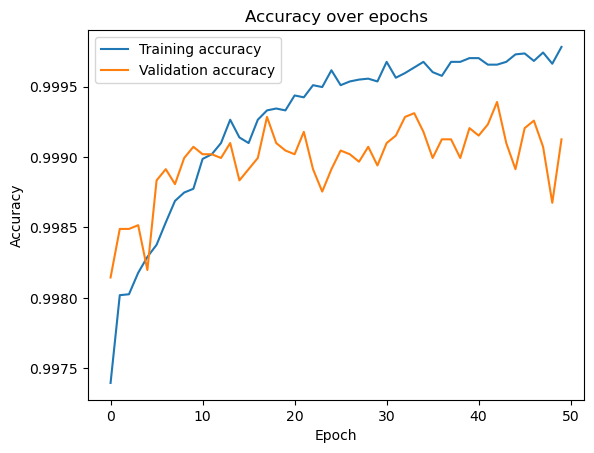

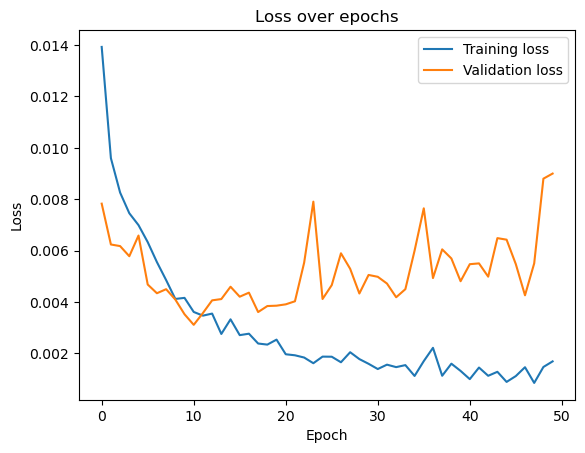

In [6]:
import matplotlib.pyplot as plt

#Accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()